Midterm Exercise 2

Use Excel and Phyton

using the attach data set from Kaggle, do the following (take note that descriptive is a method to understand the current state/problem):

Perform cross-tabulation using excel and python. 
Show data visualization using excel and python.
Bonus: other methods like t-test and hypothesis and interference using excel and python.
The goal of this project is we will understand what's the current picture of the data.

In [3]:
!pip install pandas matplotlib seaborn

^C


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 326.9 kB/s eta 0:00:33
   - -------------------------------------- 0.5/11.0 MB 326.9 kB/s eta 0:00:33
   - -------------------------------------- 0.5/11.0 MB 326.9 kB/s eta 0:00:33
   -- ------------------------------------- 0.8/11.0 MB 352.1 kB/s eta 0:00:29
   -- ------------------------------------- 0.8/11.0 M


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets\store_sales.csv")  
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Mark Gelson\AppData\Local\Temp\ipykernel_14564\2213471848.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("datasets\store_sales.csv")


,date,store,sales,promo,holiday
0,2022-01-01,1,184.78,0,0
1,2022-01-02,1,192.62,0,0
2,2022-01-03,1,212.68,0,0
3,2022-01-04,1,249.58,1,0
4,2022-01-05,1,223.50,0,0


We will need to create another column that is named day_type which will know if that day is a normal day with promo, a holiday without promo, etc.

In [5]:
def get_day_type(row):
    if row['holiday'] == 1 and row['promo'] == 1:
        return "Holiday (With Promo)"
    elif row['holiday'] == 1:
        return "Holiday (No Promo)"
    elif row['promo'] == 1:
        return "Normal (With Promo)"
    else:
        return "Normal (No Promo)"

df['day_type'] = df.apply(get_day_type, axis=1)

In [7]:
pivot_df = pd.pivot_table(
    df,
    values='sales',
    index='store',
    columns='day_type',
    aggfunc='sum'
)

print("Pivot Table: Total Sales per Store & Day Type")
display(pivot_df)

Pivot Table: Total Sales per Store & Day Type


day_type,Holiday (No Promo),Holiday (With Promo),Normal (No Promo),Normal (With Promo)
store,,,,
1,14230.57,2349.17,116876.52,36456.10
2,12472.30,4118.35,109965.46,32737.24
3,16293.62,4406.38,106946.02,31907.73
4,15225.01,4180.76,123672.77,30706.19
5,15386.30,4554.91,109554.57,31984.04
6,13557.53,5824.82,117870.70,35337.83
7,17532.11,4331.67,115324.10,32754.38
8,17808.79,4053.36,112324.14,29710.39
9,17659.47,4898.78,119271.86,36770.58


Visualization

<Figure size 1200x600 with 0 Axes>

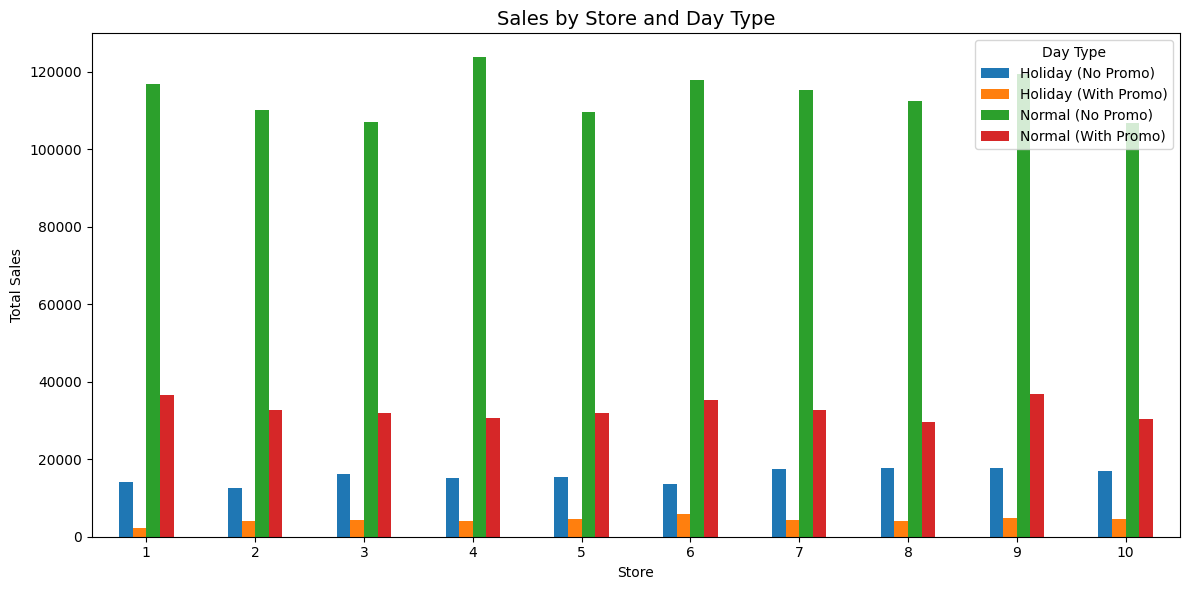

In [8]:
plt.figure(figsize=(12,6))
pivot_df.plot(kind='bar', figsize=(12,6))
plt.title("Sales by Store and Day Type", fontsize=14)
plt.ylabel("Total Sales")
plt.xlabel("Store")
plt.xticks(rotation=0)
plt.legend(title="Day Type")
plt.tight_layout()
plt.show()

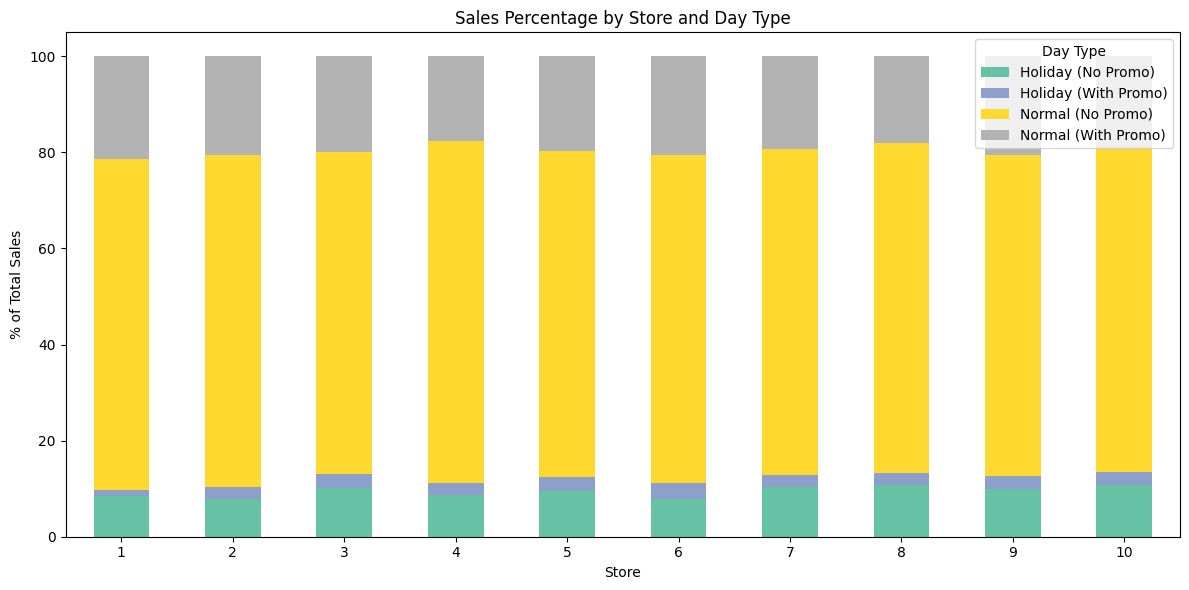

In [9]:
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

pivot_df_percent.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title("Sales Percentage by Store and Day Type")
plt.ylabel("% of Total Sales")
plt.xlabel("Store")
plt.xticks(rotation=0)
plt.legend(title="Day Type")
plt.tight_layout()
plt.show()

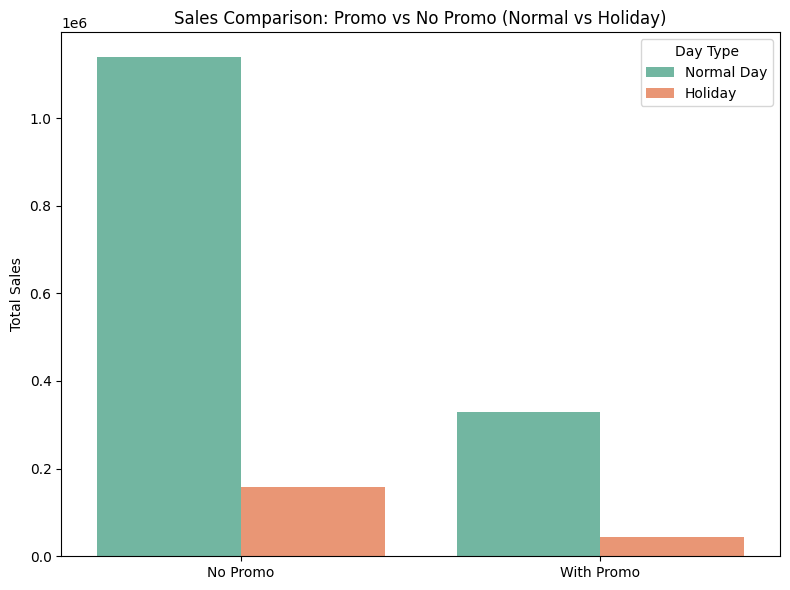

In [11]:
# Group sales by promo & holiday
promo_holiday_sales = df.groupby(['promo', 'holiday'])['sales'].sum().reset_index()

# Map readable labels
promo_holiday_sales['Promo Status'] = promo_holiday_sales['promo'].map({0: 'No Promo', 1: 'With Promo'})
promo_holiday_sales['Day Type'] = promo_holiday_sales['holiday'].map({0: 'Normal Day', 1: 'Holiday'})

# Barplot
plt.figure(figsize=(8,6))
sns.barplot(
    data=promo_holiday_sales,
    x='Promo Status',
    y='sales',
    hue='Day Type',
    palette='Set2'
)
plt.title("Sales Comparison: Promo vs No Promo (Normal vs Holiday)")
plt.ylabel("Total Sales")
plt.xlabel("")
plt.tight_layout()
plt.show()

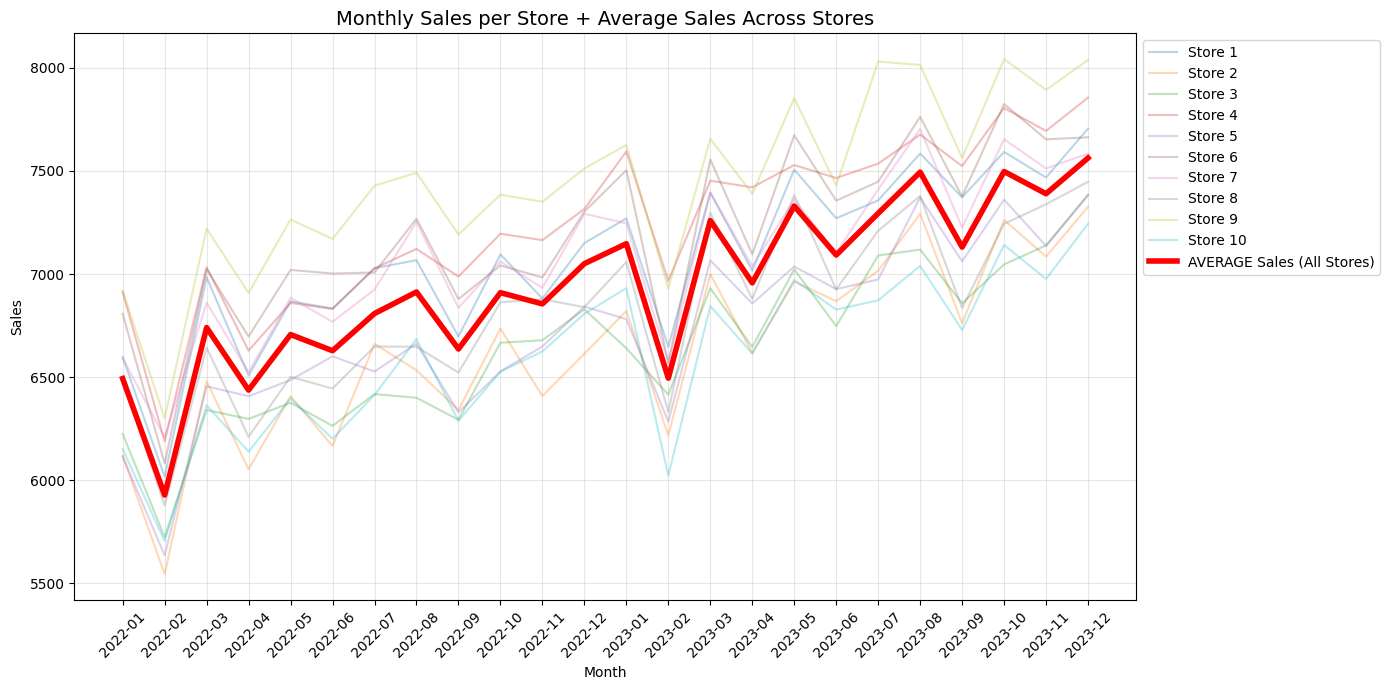

In [18]:
# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract Year-Month
df['year_month'] = df['date'].dt.to_period('M').astype(str)

# Group by store + month
monthly_store_sales = df.groupby(['year_month', 'store'])['sales'].sum().reset_index()

# Pivot: each store = one column
monthly_store_pivot = monthly_store_sales.pivot(index='year_month', columns='store', values='sales')

# Compute the **monthly average sales across all stores**
monthly_store_pivot['Average'] = monthly_store_pivot.mean(axis=1)

# Create figure
plt.figure(figsize=(14,7))

# Unique color palette
color_palette = sns.color_palette("tab10", n_colors=len(monthly_store_pivot.columns)-1)

# Plot each store with lower opacity
for idx, store in enumerate(monthly_store_pivot.columns[:-1]):  # exclude 'Average'
    plt.plot(
        monthly_store_pivot.index,
        monthly_store_pivot[store],
        color=color_palette[idx],
        linewidth=1.5,
        alpha=0.3,  # transparency
        label=f"Store {store}"
    )

# Plot AVERAGE as a thick solid line
plt.plot(
    monthly_store_pivot.index,
    monthly_store_pivot['Average'],
    color='red',
    linewidth=4,
    label='AVERAGE Sales (All Stores)'
)

# Chart styling
plt.title("Monthly Sales per Store + Average Sales Across Stores", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Since there are a lot of normal days without promo, we will use statistical test to compare fairly

In [19]:
avg_sales_daytype = df.groupby('day_type')['sales'].mean().reset_index()
avg_sales_daytype

,day_type,sales
0,Holiday (No Promo),257.933941
1,Holiday (With Promo),286.041722
2,Normal (No Promo),218.327542
3,Normal (With Promo),248.090694


In [20]:
baseline = avg_sales_daytype.loc[avg_sales_daytype['day_type']=='Normal (No Promo)', 'sales'].values[0]
avg_sales_daytype['Sales Lift %'] = ((avg_sales_daytype['sales'] - baseline) / baseline) * 100
avg_sales_daytype

,day_type,sales,Sales Lift %
0,Holiday (No Promo),257.933941,18.140817
1,Holiday (With Promo),286.041722,31.014951
2,Normal (No Promo),218.327542,0.000000
3,Normal (With Promo),248.090694,13.632340


In [22]:
!pip install scipy

   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ------- -------------------------------- 6.8/38.4 MB 37.9 MB/s eta 0:00:01
   ------------------- -------------------- 18.6/38.4 MB 47.4 MB/s eta 0:00:01
   ----------------------------- ---------- 28.3/38.4 MB 47.6 MB/s eta 0:00:01
   ---------------------------------------  37.7/38.4 MB 46.9 MB/s eta 0:00:01
   ---------------------------------------- 38.4/38.4 MB 43.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
daytype_summary = df.groupby('day_type').agg(
    total_sales=('sales', 'sum'),
    num_days=('sales', 'count')
)
daytype_summary['avg_per_day'] = daytype_summary['total_sales'] / daytype_summary['num_days']
daytype_summary

,total_sales,num_days,avg_per_day
day_type,,,
Holiday (No Promo),157081.77,609,257.933941
Holiday (With Promo),43192.30,151,286.041722
Normal (No Promo),1138578.13,5215,218.327542
Normal (With Promo),328720.17,1325,248.090694


In [26]:
!pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import numpy as np

normal_no_promo   = df[(df['holiday']==0) & (df['promo']==0)]['sales']
normal_with_promo = df[(df['holiday']==0) & (df['promo']==1)]['sales']
holiday_no_promo  = df[(df['holiday']==1) & (df['promo']==0)]['sales']
holiday_with_promo= df[(df['holiday']==1) & (df['promo']==1)]['sales']

print("Average Sales per Day Type:")
print("Normal No Promo   :", np.mean(normal_no_promo))
print("Normal With Promo :", np.mean(normal_with_promo))
print("Holiday No Promo  :", np.mean(holiday_no_promo))
print("Holiday With Promo:", np.mean(holiday_with_promo))

Average Sales per Day Type:
Normal No Promo   : 218.3275417066155
Normal With Promo : 248.09069433962262
Holiday No Promo  : 257.93394088669953
Holiday With Promo: 286.0417218543047


In [31]:
from scipy.stats import ttest_ind

def test_groups(group1, group2, name1, name2):
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    print(f"\n{name1} vs {name2}")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4e}")
    if p_val < 0.05:
        print("✅ Significant difference")
    else:
        print("❌ No significant difference")

# Pairwise comparisons
test_groups(normal_no_promo, normal_with_promo, "Normal No Promo", "Normal With Promo")
test_groups(normal_no_promo, holiday_no_promo, "Normal No Promo", "Holiday No Promo")
test_groups(normal_no_promo, holiday_with_promo, "Normal No Promo", "Holiday With Promo")
test_groups(normal_with_promo, holiday_no_promo, "Normal With Promo", "Holiday No Promo")
test_groups(normal_with_promo, holiday_with_promo, "Normal With Promo", "Holiday With Promo")
test_groups(holiday_no_promo, holiday_with_promo, "Holiday No Promo", "Holiday With Promo")



Normal No Promo vs Normal With Promo
T-statistic: -47.0750, P-value: 0.0000e+00
✅ Significant difference

Normal No Promo vs Holiday No Promo
T-statistic: -43.8849, P-value: 3.8001e-209
✅ Significant difference

Normal No Promo vs Holiday With Promo
T-statistic: -38.3518, P-value: 5.6237e-82
✅ Significant difference

Normal With Promo vs Holiday No Promo
T-statistic: -9.5945, P-value: 5.0270e-21
✅ Significant difference

Normal With Promo vs Holiday With Promo
T-statistic: -20.7182, P-value: 7.3222e-50
✅ Significant difference

Holiday No Promo vs Holiday With Promo
T-statistic: -14.4759, P-value: 4.0650e-34
✅ Significant difference


C:\Users\Mark Gelson\AppData\Local\Temp\ipykernel_14564\1254387488.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_type', y='sales', palette='Set2')


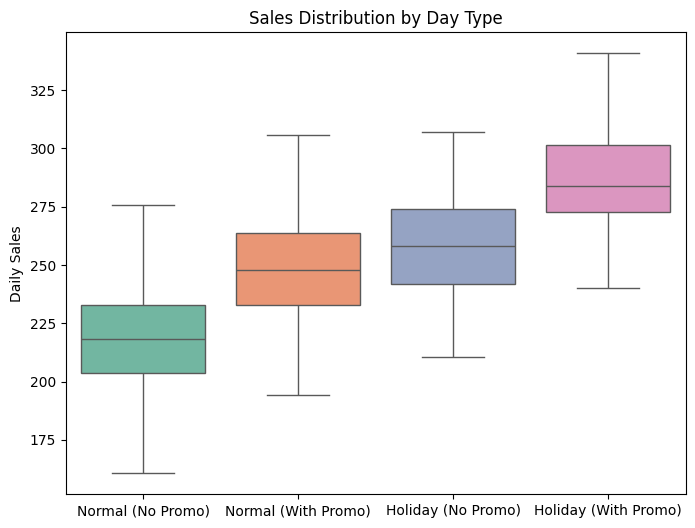

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a column day_type first
def get_day_type(row):
    if row['holiday']==1 and row['promo']==1:
        return "Holiday (With Promo)"
    elif row['holiday']==1:
        return "Holiday (No Promo)"
    elif row['promo']==1:
        return "Normal (With Promo)"
    else:
        return "Normal (No Promo)"

df['day_type'] = df.apply(get_day_type, axis=1)

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='day_type', y='sales', palette='Set2')
plt.title("Sales Distribution by Day Type")
plt.ylabel("Daily Sales")
plt.xlabel("")
plt.show()


The visualization clearly shows how daily sales vary across different day types. While Normal days without promotions naturally occur more frequently, the average daily sales are noticeably higher on days with promotions, especially during holidays. This suggests that promotions amplify the sales boost from holidays, making them the most effective in driving revenue. Conversely, holidays without promotions still outperform normal days without promos, but the effect is less pronounced. Overall, this analysis highlights that combining promotions with holidays yields the strongest sales impact.